In [59]:
library(tidyverse)

In [60]:
library(patchwork)

In [61]:
library(ggsci)

In [62]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

In [114]:
dd <- read_csv("../batch_metrics_header.csv")

New names:
• `` -> `...1`
Rows: 25 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (8): NMI_cluster/label, ARI_cluster/label, iLISI, cLISI, graph_conn, pcr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [115]:
head(dd)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.5244377,0.3055039,0.002895696,0.9793868,0.7962065,0.8265621,0.4398256,0.8359431,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,fastMNN
value,0.5759702,0.3503562,0.035850111,0.9834877,0.7964412,0.9564789,0.4849881,0.8365582,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,harmony
value,0.4947640,0.3043601,0.321042544,0.9791691,0.6794177,0.9829865,0.4654004,0.8142024,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,LIGER
value,0.5718285,0.3363794,0.011514174,0.9849313,0.6691197,0.6175676,0.4683791,0.6362667,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,scanorama
value,0.4946970,0.3089656,0.082099012,0.9666128,0.8731866,0.9877875,0.5017412,0.8187537,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,scVI
value,0.6271659,0.3889121,0.032054207,0.9894629,0.8564567,0.9193930,0.4954421,0.7845275,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,seuratCCA


In [116]:
tail(dd)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.5873884,0.3511784,4.673727e-02,0.9857297,0.8186778,0.9162082,0.4841051,0.8001687,metadata_nf_one2one_only_seuratCCA_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_type_use,seuratCCA
value,0.5708427,0.3549996,2.788532e-02,0.9846675,0.7988548,0.9629197,0.4821806,0.8148654,metadata_nf_one2one_only_seuratRPCA_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_type_use,seuratRPCA
value,0.4122858,0.1743912,1.385486e-01,0.9726988,0.5935935,0.9611968,0.3574302,0.7157793,rliger_uinmf_metadata_many_higher_expr_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_expr.h5ad,species,species,cell_type_use,rligerUINMF
value,0.3831539,0.1425133,2.239403e-01,0.9679076,0.6267154,0.9597691,0.3570919,0.6939942,rliger_uinmf_metadata_many_higher_homology_conf_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_homology_conf.h5ad,species,species,cell_type_use,rligerUINMF
value,0.3803647,0.1397461,2.216032e-01,0.9667590,0.6163610,0.9655734,0.3735020,0.7803047,rliger_uinmf_metadata_one2one_only_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_one2one_only.h5ad,species,species,cell_type_use,rligerUINMF
value,0.6434190,0.4488183,2.220446e-16,0.9972750,0.7914832,1.0000000,0.4996353,0.8193997,metadata_nf_full_SAMap_integrated.h5ad,metadata_nf_full.h5ad,species,species,cell_type_use,SAMap


In [117]:
dd[dd == 'rligerUINMF'] = 'LIGER_UINMF'

In [118]:
color_pal = c( pal_npg("nrc")(8), "#F4D714")
color_pal

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#F4D714"

In [119]:
dd = dd %>% mutate(homology_method = gsub("metadata_nf_|rliger_uinmf_metadata_", "", input_h5ad)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad|_SAMap_integrated.h5ad", "", homology_method)) %>%
arrange(desc(pcr))  %>% 
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))

In [120]:
## minmax scale batch scores

In [121]:
dd

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.6434190,0.4488183,2.220446e-16,0.9972750,0.7914832,1.0000000,0.4996353,0.8193997,metadata_nf_full_SAMap_integrated.h5ad,metadata_nf_full.h5ad,species,species,cell_type_use,SAMap,all genes
value,0.3743281,0.1534254,3.928536e-01,0.9659859,0.6597980,0.9922235,0.4433257,0.8153399,metadata_nf_one2one_only_LIGER_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_type_use,LIGER,one2one only
value,0.4462768,0.2549752,3.695237e-01,0.9730665,0.6799246,0.9904823,0.4542249,0.8041505,metadata_nf_many_higher_homology_conf_LIGER_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_type_use,LIGER,stronger homology
value,0.4139869,0.2532926,2.218752e-01,0.9512955,0.7979370,0.9883061,0.4934558,0.8402780,metadata_nf_one2one_only_scVI_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_type_use,scVI,one2one only
value,0.4946970,0.3089656,8.209901e-02,0.9666128,0.8731866,0.9877875,0.5017412,0.8187537,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,scVI,higher expression
value,0.5590894,0.3732214,5.522502e-02,0.9759275,0.8787493,0.9858998,0.4987750,0.8267381,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_type_use,scVI,stronger homology
value,0.4947640,0.3043601,3.210425e-01,0.9791691,0.6794177,0.9829865,0.4654004,0.8142024,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,LIGER,higher expression
value,0.5415893,0.3205360,5.529217e-02,0.9810911,0.7764163,0.9666548,0.4829743,0.8552517,metadata_nf_one2one_only_harmony_integrated.h5ad,metadata_nf_one2one_only.h5ad,species,species,cell_type_use,harmony,one2one only
value,0.3803647,0.1397461,2.216032e-01,0.9667590,0.6163610,0.9655734,0.3735020,0.7803047,rliger_uinmf_metadata_one2one_only_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_one2one_only.h5ad,species,species,cell_type_use,LIGER_UINMF,one2one only


In [122]:
dd[which(dd$integration_method == 'SAMap'), 'homology_method'] = 'full'

In [123]:
dd = dd %>% 
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))) 

In [124]:
ranked = dd %>% 
mutate(graph_conn_scaled = (graph_conn - min(graph_conn)) / (max(graph_conn) - min(graph_conn))) %>% 
mutate(pcr_scaled = (pcr - min(pcr)) / (max(pcr) - min(pcr))) %>% 
mutate(iLISI_scaled = (iLISI - min(iLISI)) / (max(iLISI) - min(iLISI))) %>% 
mutate(silhouette_batch_scaled = (silhouette_batch - min(silhouette_batch)) / (max(silhouette_batch) - min(silhouette_batch))) %>% 
mutate(avg_score = (graph_conn_scaled + pcr_scaled + iLISI_scaled + silhouette_batch_scaled) * 0.25) %>% 
arrange(desc(avg_score)) %>% 
mutate(cLISI_scaled = (cLISI- min(cLISI)) / (max(cLISI) - min(cLISI))) %>% 
mutate(silhouette_scaled = (silhouette - min(silhouette)) / (max(silhouette) - min(silhouette))) %>% 
mutate(NMI_scaled = (`NMI_cluster/label` - min(`NMI_cluster/label`)) / (max(`NMI_cluster/label`) - min(`NMI_cluster/label`)))  %>% 
mutate(ARI_scaled = (`ARI_cluster/label` - min(`ARI_cluster/label`)) / (max(`ARI_cluster/label`) - min(`ARI_cluster/label`)))

In [125]:
ranked

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.4139869,0.2532926,2.218752e-01,0.9512955,0.7979370,0.9883061,0.4934558,0.8402780,metadata_nf_one2one_only_scVI_integrated.h5ad,⋯,one2one only,0.71660298,0.97151460,0.56477846,0.93162222,0.79612957,0.0000000,0.942720836,0.14738050,0.36737848
value,0.3743281,0.1534254,3.928536e-01,0.9659859,0.6597980,0.9922235,0.4433257,0.8153399,metadata_nf_one2one_only_LIGER_integrated.h5ad,⋯,one2one only,0.23216959,0.98105710,1.00000000,0.81774163,0.75774208,0.3194985,0.596157909,0.00000000,0.04425912
value,0.4946970,0.3089656,8.209901e-02,0.9666128,0.8731866,0.9877875,0.5017412,0.8187537,metadata_nf_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.98049257,0.97025134,0.20898119,0.83333095,0.74826401,0.3331322,1.000000000,0.44731666,0.54750799
value,0.4462768,0.2549752,3.695237e-01,0.9730665,0.6799246,0.9904823,0.4542249,0.8041505,metadata_nf_many_higher_homology_conf_LIGER_integrated.h5ad,⋯,stronger homology,0.30275064,0.97681560,0.94061418,0.76664512,0.74670639,0.4734938,0.671507212,0.26737700,0.37282258
value,0.5590894,0.3732214,5.522502e-02,0.9759275,0.8787493,0.9858998,0.4987750,0.8267381,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,1.00000000,0.96565295,0.14057405,0.86979208,0.74400477,0.5357170,0.979494048,0.68661276,0.75540681
value,0.4947640,0.3043601,3.210425e-01,0.9791691,0.6794177,0.9829865,0.4654004,0.8142024,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,⋯,higher expression,0.30097307,0.95855634,0.81720659,0.81254756,0.72232089,0.6062182,0.748766178,0.44756574,0.53260686
value,0.5676854,0.3387912,4.150090e-02,0.9839841,0.8090837,0.9590348,0.4905881,0.8446251,metadata_nf_many_higher_homology_conf_harmony_integrated.h5ad,⋯,stronger homology,0.75569268,0.90021185,0.10563960,0.95147349,0.67825440,0.7109385,0.922895969,0.71855752,0.64400823
value,0.5415893,0.3205360,5.529217e-02,0.9810911,0.7764163,0.9666548,0.4829743,0.8552517,metadata_nf_one2one_only_harmony_integrated.h5ad,⋯,one2one only,0.64113296,0.91877365,0.14074498,1.00000000,0.67516290,0.6480187,0.870259859,0.62157859,0.58494395
value,0.6147381,0.3880140,3.996386e-02,0.9885402,0.8367091,0.9645548,0.4953252,0.8047220,metadata_nf_many_higher_homology_conf_seuratRPCA_integrated.h5ad,⋯,stronger homology,0.85257122,0.91365822,0.10172710,0.76925492,0.65930286,0.8100289,0.955644859,0.89341544,0.80326825


In [126]:
## set the order of levels
ranked$homology_method = factor(ranked$homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))

In [127]:
ranked

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.4139869,0.2532926,2.218752e-01,0.9512955,0.7979370,0.9883061,0.4934558,0.8402780,metadata_nf_one2one_only_scVI_integrated.h5ad,⋯,one2one only,0.71660298,0.97151460,0.56477846,0.93162222,0.79612957,0.0000000,0.942720836,0.14738050,0.36737848
value,0.3743281,0.1534254,3.928536e-01,0.9659859,0.6597980,0.9922235,0.4433257,0.8153399,metadata_nf_one2one_only_LIGER_integrated.h5ad,⋯,one2one only,0.23216959,0.98105710,1.00000000,0.81774163,0.75774208,0.3194985,0.596157909,0.00000000,0.04425912
value,0.4946970,0.3089656,8.209901e-02,0.9666128,0.8731866,0.9877875,0.5017412,0.8187537,metadata_nf_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.98049257,0.97025134,0.20898119,0.83333095,0.74826401,0.3331322,1.000000000,0.44731666,0.54750799
value,0.4462768,0.2549752,3.695237e-01,0.9730665,0.6799246,0.9904823,0.4542249,0.8041505,metadata_nf_many_higher_homology_conf_LIGER_integrated.h5ad,⋯,stronger homology,0.30275064,0.97681560,0.94061418,0.76664512,0.74670639,0.4734938,0.671507212,0.26737700,0.37282258
value,0.5590894,0.3732214,5.522502e-02,0.9759275,0.8787493,0.9858998,0.4987750,0.8267381,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,1.00000000,0.96565295,0.14057405,0.86979208,0.74400477,0.5357170,0.979494048,0.68661276,0.75540681
value,0.4947640,0.3043601,3.210425e-01,0.9791691,0.6794177,0.9829865,0.4654004,0.8142024,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,⋯,higher expression,0.30097307,0.95855634,0.81720659,0.81254756,0.72232089,0.6062182,0.748766178,0.44756574,0.53260686
value,0.5676854,0.3387912,4.150090e-02,0.9839841,0.8090837,0.9590348,0.4905881,0.8446251,metadata_nf_many_higher_homology_conf_harmony_integrated.h5ad,⋯,stronger homology,0.75569268,0.90021185,0.10563960,0.95147349,0.67825440,0.7109385,0.922895969,0.71855752,0.64400823
value,0.5415893,0.3205360,5.529217e-02,0.9810911,0.7764163,0.9666548,0.4829743,0.8552517,metadata_nf_one2one_only_harmony_integrated.h5ad,⋯,one2one only,0.64113296,0.91877365,0.14074498,1.00000000,0.67516290,0.6480187,0.870259859,0.62157859,0.58494395
value,0.6147381,0.3880140,3.996386e-02,0.9885402,0.8367091,0.9645548,0.4953252,0.8047220,metadata_nf_many_higher_homology_conf_seuratRPCA_integrated.h5ad,⋯,stronger homology,0.85257122,0.91365822,0.10172710,0.76925492,0.65930286,0.8100289,0.955644859,0.89341544,0.80326825


In [77]:

batch = ranked %>% arrange(avg_score) %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
ggplot(aes(x = fct_inorder(type), y = avg_score, color= integration_method)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Species mixing score', y = 'integration strategy') + ylim(0,1) + scale_shape(name = 'homology method')

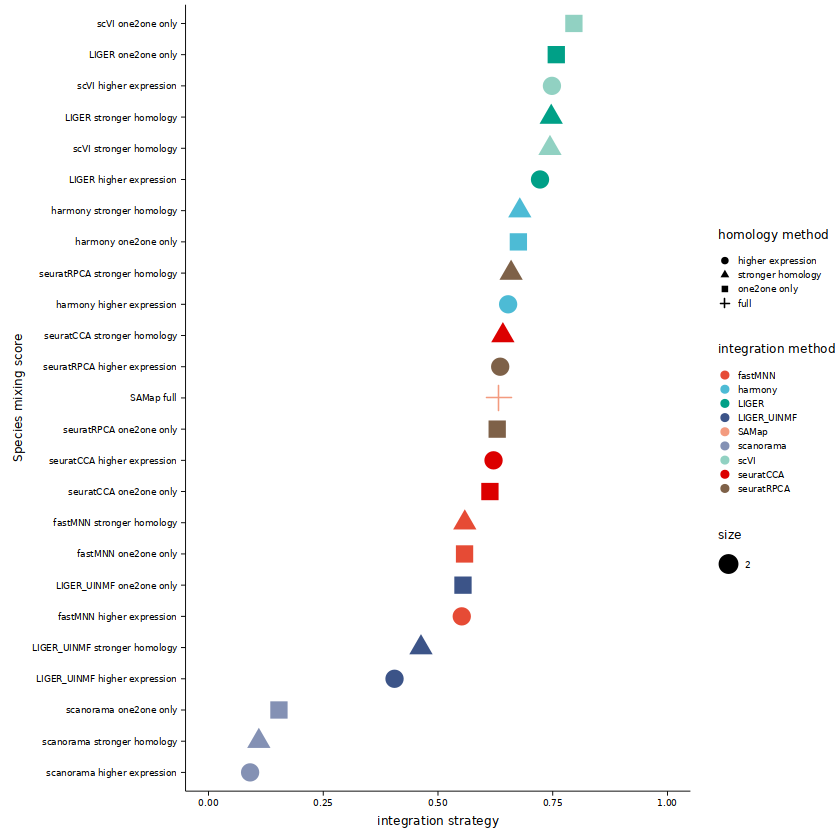

In [78]:
batch

In [79]:
## Biology conservation

In [128]:
traj = read_csv("../trajectory.csv")
head(traj)
traj[traj == 'rligerUINMF'] = 'LIGER_UINMF'

New names:
• `` -> `...1`
Rows: 25 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (2): trajectory_conservation_score_batch, trajectory_conservation_score_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,trajectory_conservation_score_batch,trajectory_conservation_score_none,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,root_cell,integration_method
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.5119862,0.3219419,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,fastMNN
value,0.9371879,0.6013150,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,harmony
value,0.8370419,0.5913675,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,LIGER
value,0.0000000,0.0000000,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,scanorama
value,0.8911880,0.5023537,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,scVI
value,0.6454511,0.5125162,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,seuratCCA


In [97]:
cs <- read_csv("../../../results/sccaf_header.csv")

Rows: 3406 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): cell_type, type_label, from_species, to_species, integration_method...
dbl (6): ROC_AUC, PR_AUC, test_acc, CV_acc, adj_rand_score, pct_cell_type_kept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [98]:
head(cs)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Apoptotic_like,0.0139431670,0.8947003,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN
Apoptotic_like_2,0.0007411899,0.5256551,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN
Blastula,0.9996936882,0.9999628,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN
Blood,0.9933114649,0.9994066,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN
Dorsal_organizer,0.4770164162,0.9850917,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN
Endoderm,0.2964527993,0.9541034,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN


In [99]:
cs[cs$integration_method == 'SAMap', 'homology_method'] = 'full'
cs[cs == 'dr'] = 'drerio'
cs[cs == 'xt'] = 'xtropicalis'
cs[cs == 'one2one'] = 'one2one_only'

In [100]:
levels(factor(cs$integration_method))

[1] "fastMNN"      "harmony"      "LIGER"        "rligerUINMF"  "SAMap"       
 [6] "scanorama"    "scVI"         "seuratCCA"    "seuratRPCA"   "unintegrated"

In [101]:
levels(factor(cs$homology_method))

[1] "full"

In [102]:
orig = cs %>% filter(integration_method == 'unintegrated')

In [103]:
intg = cs %>% filter(integration_method != 'unintegrated') %>% filter(type_label == 'original')

In [104]:
intg = intg %>% mutate(homology_method = gsub("metadata_nf_|rliger_uinmf_metadata_", "", input_file)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad", "", homology_method)) %>%
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))
intg[intg$integration_method == 'SAMap', 'homology_method'] = 'full'

In [105]:
head(intg)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Apoptotic_like,0.0139431670,0.8947003,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN,higher expression
Apoptotic_like_2,0.0007411899,0.5256551,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN,higher expression
Blastula,0.9996936882,0.9999628,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN,higher expression
Blood,0.9933114649,0.9994066,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN,higher expression
Dorsal_organizer,0.4770164162,0.9850917,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN,higher expression
Endoderm,0.2964527993,0.9541034,0.6489083,0.6018072,original,drerio,drerio,fastMNN,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN,higher expression


## accuracy loss

In [106]:
acc_loss = merge(orig, intg, by = c("cell_type", "from_species"), suffixes = c("_orig", "_intg")) %>% 
mutate(acc_loss = abs(test_acc_orig - test_acc_intg))

In [107]:
head(acc_loss)

,cell_type,from_species,ROC_AUC_orig,PR_AUC_orig,test_acc_orig,CV_acc_orig,type_label_orig,to_species_orig,integration_method_orig,input_file_orig,⋯,CV_acc_intg,type_label_intg,to_species_intg,integration_method_intg,input_file_intg,key_use_intg,adj_rand_score_intg,pct_cell_type_kept_intg,homology_method_intg,acc_loss
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,Apoptotic_like,drerio,0.1524843,0.9585732,0.8727526,0.8833333,original,drerio,unintegrated,/nfs/research/irene/ysong/DATA/XenopusZebrafishEmbryo/drerio_embryo_final_gene_id.h5ad,⋯,0.8265060,original,drerio,scVI,metadata_nf_many_higher_homology_conf_scVI_integrated.h5ad,cell_type_use,NaN,NaN,stronger homology,0.05188485
2,Apoptotic_like,drerio,0.1524843,0.9585732,0.8727526,0.8833333,original,drerio,unintegrated,/nfs/research/irene/ysong/DATA/XenopusZebrafishEmbryo/drerio_embryo_final_gene_id.h5ad,⋯,0.7618474,original,drerio,scanorama,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,cell_type_use,NaN,NaN,higher expression,0.10509685
3,Apoptotic_like,drerio,0.1524843,0.9585732,0.8727526,0.8833333,original,drerio,unintegrated,/nfs/research/irene/ysong/DATA/XenopusZebrafishEmbryo/drerio_embryo_final_gene_id.h5ad,⋯,0.7931727,original,drerio,harmony,metadata_nf_many_higher_expr_harmony_integrated.h5ad,cell_type_use,NaN,NaN,higher expression,0.09201504
4,Apoptotic_like,drerio,0.1524843,0.9585732,0.8727526,0.8833333,original,drerio,unintegrated,/nfs/research/irene/ysong/DATA/XenopusZebrafishEmbryo/drerio_embryo_final_gene_id.h5ad,⋯,0.7630522,original,drerio,harmony,metadata_nf_one2one_only_harmony_integrated.h5ad,cell_type_use,NaN,NaN,one2one only,0.11833665
5,Apoptotic_like,drerio,0.1524843,0.9585732,0.8727526,0.8833333,original,drerio,unintegrated,/nfs/research/irene/ysong/DATA/XenopusZebrafishEmbryo/drerio_embryo_final_gene_id.h5ad,⋯,0.1421687,original,drerio,LIGER,metadata_nf_many_higher_homology_conf_LIGER_integrated.h5ad,cell_type_use,NaN,NaN,stronger homology,0.73514077
6,Apoptotic_like,drerio,0.1524843,0.9585732,0.8727526,0.8833333,original,drerio,unintegrated,/nfs/research/irene/ysong/DATA/XenopusZebrafishEmbryo/drerio_embryo_final_gene_id.h5ad,⋯,0.5580321,original,drerio,fastMNN,metadata_nf_one2one_only_fastMNN_integrated.h5ad,cell_type_use,NaN,NaN,one2one only,0.25032389


In [108]:
acc_loss %>% select(integration_method_intg, homology_method_intg, acc_loss) %>% unique() %>% arrange(acc_loss)

## here we can see that adding one-to-many paralogs really improved the integration

integration_method_intg,homology_method_intg,acc_loss
<chr>,<chr>,<dbl>
SAMap,full,0.01414097
SAMap,full,0.01889595
seuratRPCA,stronger homology,0.04161265
seuratCCA,stronger homology,0.04336961
scanorama,stronger homology,0.04561272
seuratRPCA,higher expression,0.04568095
seuratRPCA,stronger homology,0.04594432
seuratCCA,higher expression,0.04661913
scVI,stronger homology,0.05188485


In [129]:
levels(factor(traj$integration_method))
levels(factor(ranked$integration_method))

[1] "fastMNN"     "harmony"     "LIGER"       "LIGER_UINMF" "SAMap"      
[6] "scanorama"   "scVI"        "seuratCCA"   "seuratRPCA"

[1] "fastMNN"     "harmony"     "LIGER"       "LIGER_UINMF" "SAMap"      
[6] "scanorama"   "scVI"        "seuratCCA"   "seuratRPCA"

In [130]:
ranked = merge(ranked, traj, by = c('input_h5ad', 'species_key', 'batch_key', 'cluster_key', 'integration_method'))

In [131]:
dim(ranked)

[1] 25 30

In [132]:
ranked = ranked %>% mutate(traj_scaled = (trajectory_conservation_score_batch - min(trajectory_conservation_score_batch)) / (max(trajectory_conservation_score_batch) - min(trajectory_conservation_score_batch)))

In [135]:
ranked_dd = ranked %>% select(integration_method, homology_method, cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled, traj_scaled) %>% 
mutate(cLISI_scaled_rank = dense_rank(desc(cLISI_scaled))) %>% 
mutate(silhouette_scaled_rank = dense_rank(desc(silhouette_scaled))) %>%
mutate(ARI_scaled_rank = dense_rank(desc(ARI_scaled))) %>%
mutate(NMI_scaled_rank = dense_rank(desc(NMI_scaled))) %>% 
mutate(traj_scaled_rank = dense_rank(desc(traj_scaled))) %>% 
mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE)

In [136]:
## min max scale accuracy loss

acc_loss_dd = acc_loss %>% select(homology_method_intg,integration_method_intg, acc_loss) %>% mutate(integration_method_intg = gsub("rligerUINMF", "LIGER_UINMF",integration_method_intg)) %>%  
mutate(homology_method = factor(homology_method_intg, levels = c('full', "one2one only", 'higher expression', 'stronger homology'))) %>% 
group_by(integration_method_intg, homology_method) %>% 
mutate(acc_loss = ifelse(acc_loss < 0, 0, acc_loss)) %>% 
mutate(acc_avg = abs(mean(acc_loss, na.rm = TRUE))) %>% ungroup() %>% 
mutate(acc_loss_scaled = 1- ((acc_avg - min(acc_avg)) / max(acc_avg) - min(acc_avg)))%>% 
mutate(type = paste(integration_method_intg, homology_method, sep = " ")) %>% ungroup() %>% 
mutate(acc_loss_scaled_rank = dense_rank(desc(acc_loss_scaled))) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(integration_method = integration_method_intg)

In [137]:
acc_loss_dd %>% arrange(acc_loss_scaled_rank)

homology_method_intg,integration_method_intg,acc_loss,homology_method,acc_avg,acc_loss_scaled,type,acc_loss_scaled_rank,integration_method
<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<int>,<chr>
full,SAMap,0.01889595,full,0.01666705,1.01666705,SAMap full,1,SAMap
stronger homology,seuratRPCA,0.04594432,stronger homology,0.04404261,0.97126934,seuratRPCA stronger homology,2,seuratRPCA
stronger homology,seuratCCA,0.05378077,stronger homology,0.04921002,0.96270008,seuratCCA stronger homology,3,seuratCCA
higher expression,seuratRPCA,0.05270642,higher expression,0.04962207,0.96201676,seuratRPCA higher expression,4,seuratRPCA
higher expression,seuratCCA,0.05258002,higher expression,0.04996305,0.96145131,seuratCCA higher expression,5,seuratCCA
stronger homology,scVI,0.05188485,stronger homology,0.06470048,0.93701178,scVI stronger homology,6,scVI
higher expression,scVI,0.05637185,higher expression,0.06579096,0.93520341,scVI higher expression,7,scVI
stronger homology,scanorama,0.10234777,stronger homology,0.07743970,0.91588595,scanorama stronger homology,8,scanorama
stronger homology,harmony,0.08879199,stronger homology,0.07751502,0.91576106,harmony stronger homology,9,harmony


## merge acc_loss and bio metrics

In [141]:
bio_dd = merge(ranked_dd, acc_loss_dd, by = c("type", "integration_method", "homology_method"))

In [142]:
bio_dd =  bio_dd %>% 
mutate(avg_score = acc_loss_scaled * 0.75 + silhouette_scaled*0.05 + cLISI_scaled*0.05 + ARI_scaled*0.05 + NMI_scaled*0.05 + traj_scaled*0.05) %>% 
arrange(desc(avg_score)) 

In [143]:
bio_dd

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,traj_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,traj_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
SAMap full,SAMap,full,1.0000000,0.985441501,1.00000000,1.00000000,0.5433187,1,2,1,1,22,full,SAMap,0.01889595,0.01666705,1.01666705,1,0.9889383
seuratRPCA stronger homology,seuratRPCA,stronger homology,0.8100289,0.955644859,0.89341544,0.80326825,0.7217988,5,6,5,5,8,stronger homology,seuratRPCA,0.04594432,0.04404261,0.97126934,2,0.9376598
seuratCCA stronger homology,seuratCCA,stronger homology,0.8389878,0.971841261,0.92801169,0.88540657,0.6223055,2,4,2,3,15,stronger homology,seuratCCA,0.05378077,0.04921002,0.96270008,3,0.9343527
seuratRPCA higher expression,seuratRPCA,higher expression,0.8160919,0.941140280,0.90966892,0.86623751,0.7190876,4,8,3,4,9,higher expression,seuratRPCA,0.05270642,0.04962207,0.96201676,4,0.9341239
seuratCCA higher expression,seuratCCA,higher expression,0.8300970,0.956453015,0.93959973,0.80617396,0.6887104,3,5,4,2,12,higher expression,seuratCCA,0.05258002,0.04996305,0.96145131,5,0.9321402
scVI stronger homology,scVI,stronger homology,0.5357170,0.979494048,0.68661276,0.75540681,0.7899790,17,3,6,12,6,stronger homology,scVI,0.05188485,0.06470048,0.93701178,6,0.8901193
harmony higher expression,harmony,higher expression,0.7001436,0.884181439,0.74934538,0.68142680,1.0000000,11,10,9,7,1,higher expression,harmony,0.09201504,0.08049133,0.91082535,11,0.8838739
harmony stronger homology,harmony,stronger homology,0.7109385,0.922895969,0.71855752,0.64400823,0.7069960,10,9,11,11,11,stronger homology,harmony,0.08879199,0.07751502,0.91576106,9,0.8719906
scVI higher expression,scVI,higher expression,0.3331322,1.000000000,0.44731666,0.54750799,0.9509171,23,1,16,18,2,higher expression,scVI,0.05637185,0.06579096,0.93520341,7,0.8653463


In [144]:
bio = bio_dd %>%
ggplot(aes(x = fct_inorder(type), y = acc_loss_scaled, color= integration_method_intg)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Biology conservation score', y = 'integration strategy') + scale_shape(name = 'homology method') 

In [145]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:patchwork’:

    align_plots




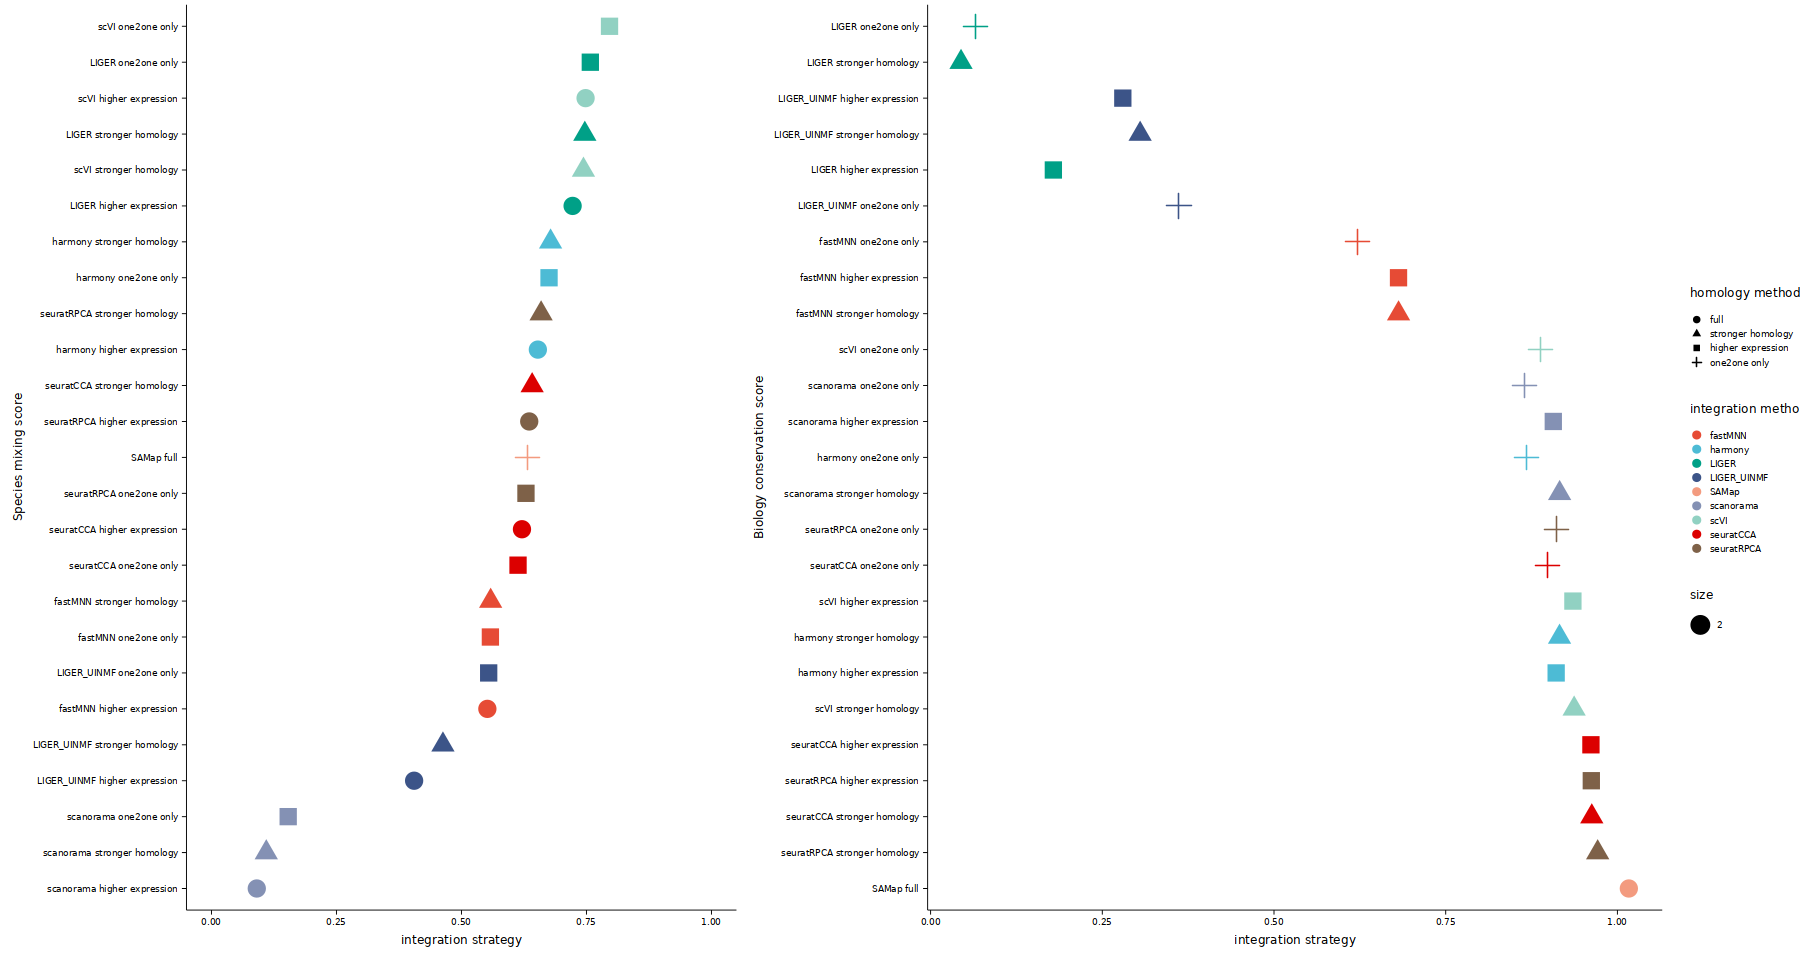

In [146]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_grid(batch + theme(legend.position = 'none'), bio, rel_widths = c(0.7, 1))

## overall ranking

In [147]:
batch_ranking = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
select(type, avg_score, integration_method, homology_method)

In [148]:
bio_ranking = bio_dd

In [149]:
merged = merge(batch_ranking, bio_ranking, by = 'type', suffixes = c("_batch", "_bio")) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(total_score = 0.4*avg_score_batch + 0.6*avg_score_bio) %>% arrange(desc(total_score)) %>% 
mutate(ranking = seq(from = 1, to = nrow(.)))  

merged

type,avg_score_batch,integration_method_batch,homology_method_batch,integration_method_bio,homology_method_bio,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,⋯,traj_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score_bio,total_score,ranking
<chr>,<dbl>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
SAMap full,0.63256282,SAMap,full,SAMap,full,1.0000000,0.985441501,1.00000000,1.00000000,⋯,22,full,SAMap,0.01889595,0.01666705,1.01666705,1,0.9889383,0.8463881,1
scVI stronger homology,0.74400477,scVI,stronger homology,scVI,stronger homology,0.5357170,0.979494048,0.68661276,0.75540681,⋯,6,stronger homology,scVI,0.05188485,0.06470048,0.93701178,6,0.8901193,0.8316735,2
seuratRPCA stronger homology,0.65930286,seuratRPCA,stronger homology,seuratRPCA,stronger homology,0.8100289,0.955644859,0.89341544,0.80326825,⋯,8,stronger homology,seuratRPCA,0.04594432,0.04404261,0.97126934,2,0.9376598,0.8263170,3
scVI higher expression,0.74826401,scVI,higher expression,scVI,higher expression,0.3331322,1.000000000,0.44731666,0.54750799,⋯,2,higher expression,scVI,0.05637185,0.06579096,0.93520341,7,0.8653463,0.8185134,4
seuratCCA stronger homology,0.64137376,seuratCCA,stronger homology,seuratCCA,stronger homology,0.8389878,0.971841261,0.92801169,0.88540657,⋯,15,stronger homology,seuratCCA,0.05378077,0.04921002,0.96270008,3,0.9343527,0.8171611,5
seuratRPCA higher expression,0.63555362,seuratRPCA,higher expression,seuratRPCA,higher expression,0.8160919,0.941140280,0.90966892,0.86623751,⋯,9,higher expression,seuratRPCA,0.05270642,0.04962207,0.96201676,4,0.9341239,0.8146958,6
seuratCCA higher expression,0.62102508,seuratCCA,higher expression,seuratCCA,higher expression,0.8300970,0.956453015,0.93959973,0.80617396,⋯,12,higher expression,seuratCCA,0.05258002,0.04996305,0.96145131,5,0.9321402,0.8076941,7
harmony stronger homology,0.67825440,harmony,stronger homology,harmony,stronger homology,0.7109385,0.922895969,0.71855752,0.64400823,⋯,11,stronger homology,harmony,0.08879199,0.07751502,0.91576106,9,0.8719906,0.7944961,8
harmony higher expression,0.65280867,harmony,higher expression,harmony,higher expression,0.7001436,0.884181439,0.74934538,0.68142680,⋯,1,higher expression,harmony,0.09201504,0.08049133,0.91082535,11,0.8838739,0.7914478,9


In [150]:
order_type = levels(factor(merged$type, levels = merged$type))

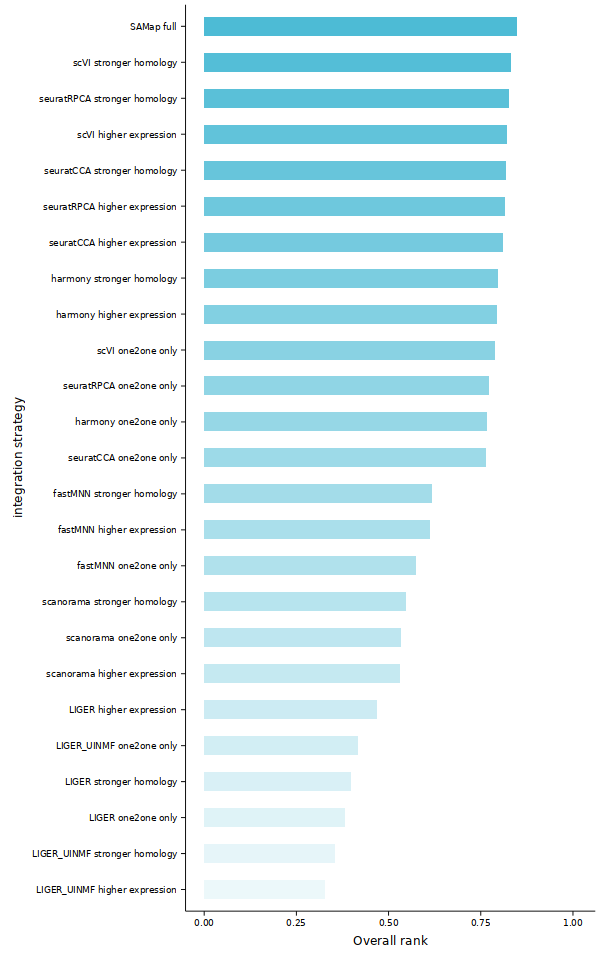

In [153]:
options(repr.plot.width = 5, repr.plot.height = 8)

merged  %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x   +
labs(y = 'Overall rank', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) + 
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

overall = merged %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Overall score', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) +
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## batch ranking

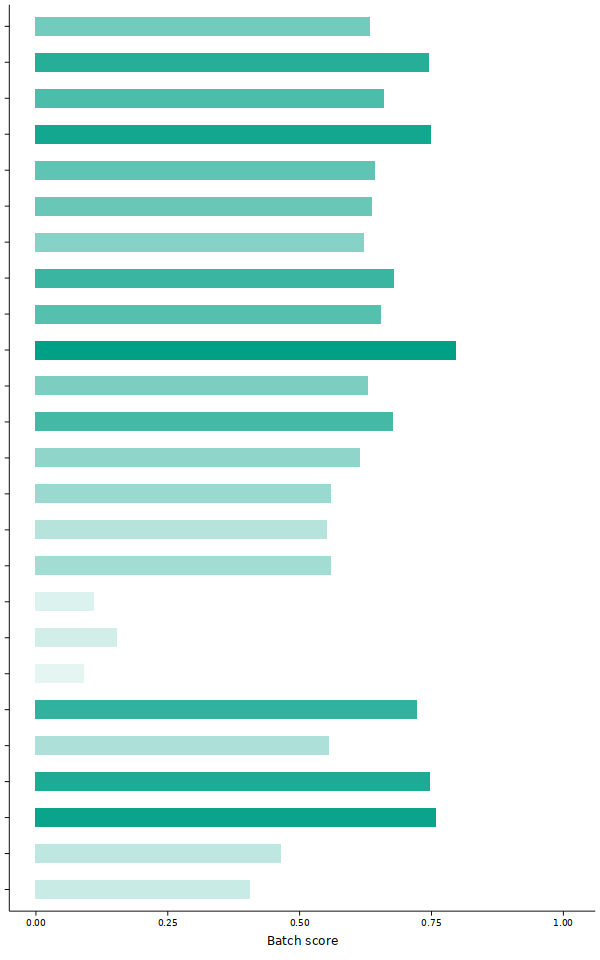

In [154]:
options(repr.plot.width = 5, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')


batch_overall = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')

## batch scores

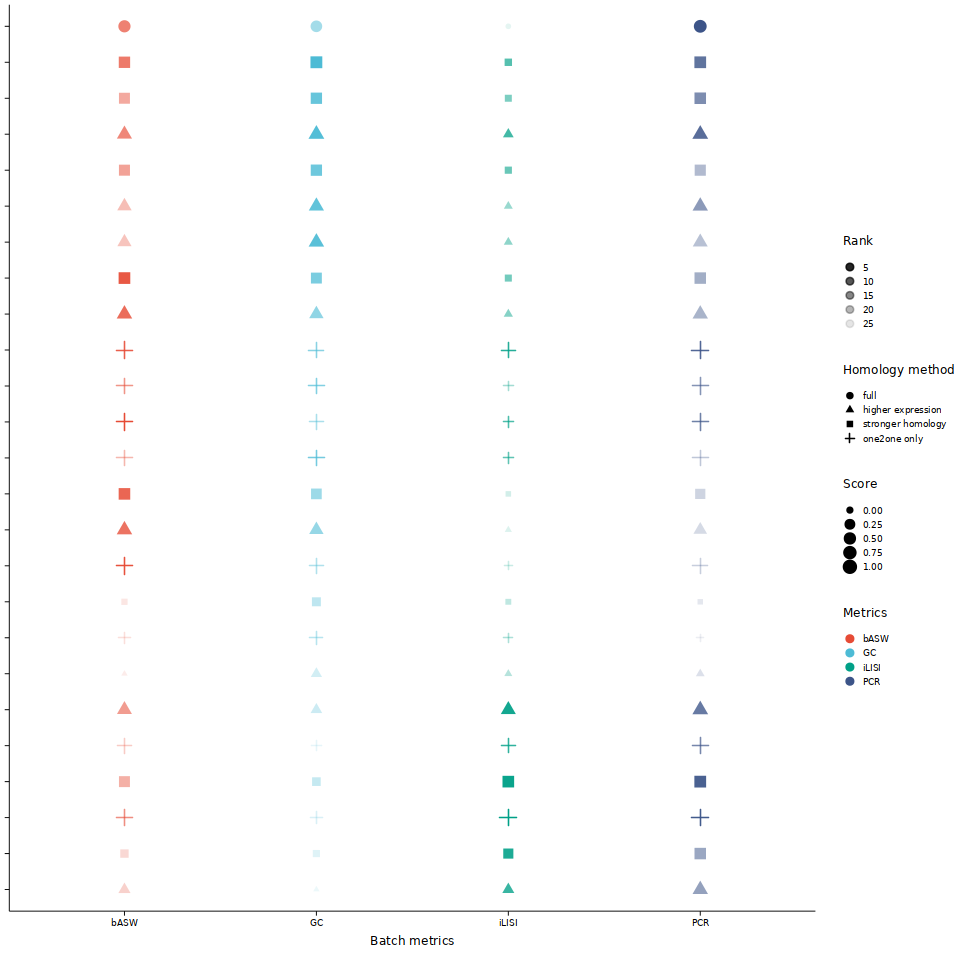

In [155]:
options(repr.plot.width = 8, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) + 
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics') 

In [156]:
batch_detail = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics')

## Bio ranking

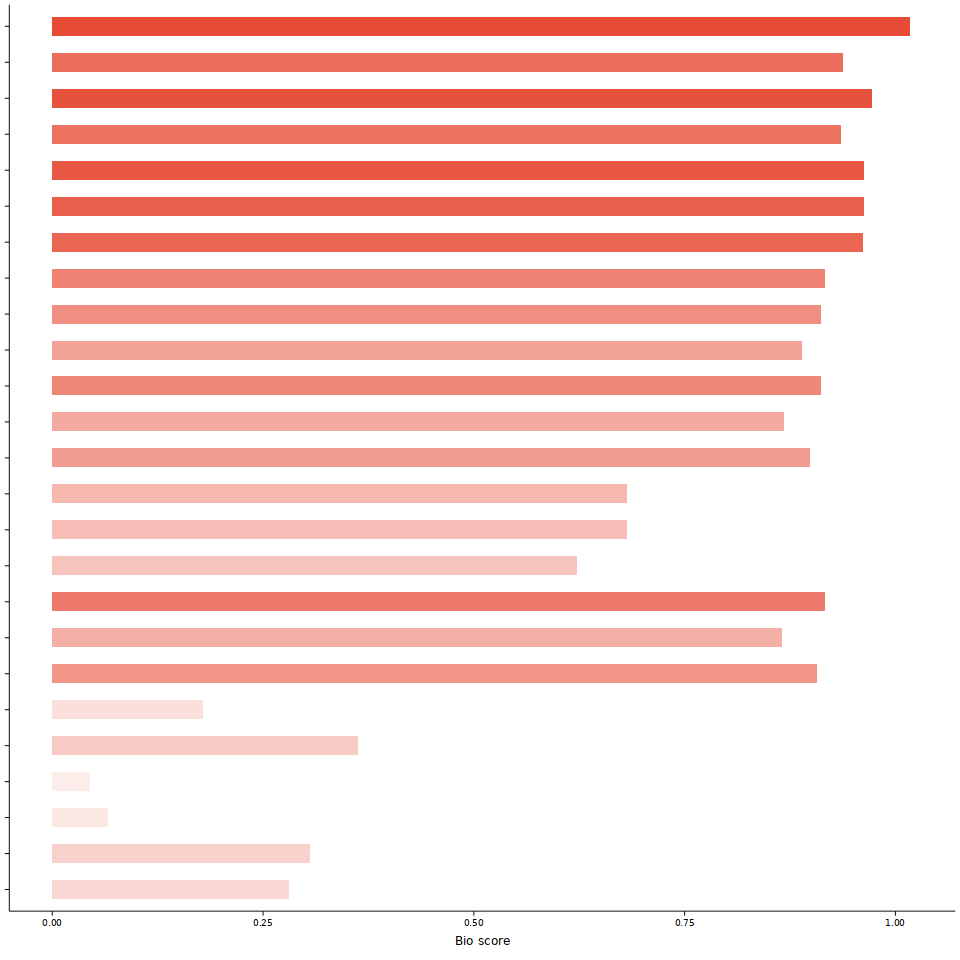

In [157]:
bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') + 
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.02))

In [158]:
bio_overall = bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.05))

## Bio scores

In [159]:
head(bio_ranking)

,type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,traj_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,traj_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,SAMap full,SAMap,full,1.0000000,0.9854415,1.0000000,1.0000000,0.5433187,1,2,1,1,22,full,SAMap,0.01889595,0.01666705,1.0166670,1,0.9889383
2,seuratRPCA stronger homology,seuratRPCA,stronger homology,0.8100289,0.9556449,0.8934154,0.8032682,0.7217988,5,6,5,5,8,stronger homology,seuratRPCA,0.04594432,0.04404261,0.9712693,2,0.9376598
3,seuratCCA stronger homology,seuratCCA,stronger homology,0.8389878,0.9718413,0.9280117,0.8854066,0.6223055,2,4,2,3,15,stronger homology,seuratCCA,0.05378077,0.04921002,0.9627001,3,0.9343527
4,seuratRPCA higher expression,seuratRPCA,higher expression,0.8160919,0.9411403,0.9096689,0.8662375,0.7190876,4,8,3,4,9,higher expression,seuratRPCA,0.05270642,0.04962207,0.9620168,4,0.9341239
5,seuratCCA higher expression,seuratCCA,higher expression,0.8300970,0.9564530,0.9395997,0.8061740,0.6887104,3,5,4,2,12,higher expression,seuratCCA,0.05258002,0.04996305,0.9614513,5,0.9321402
6,scVI stronger homology,scVI,stronger homology,0.5357170,0.9794940,0.6866128,0.7554068,0.7899790,17,3,6,12,6,stronger homology,scVI,0.05188485,0.06470048,0.9370118,6,0.8901193


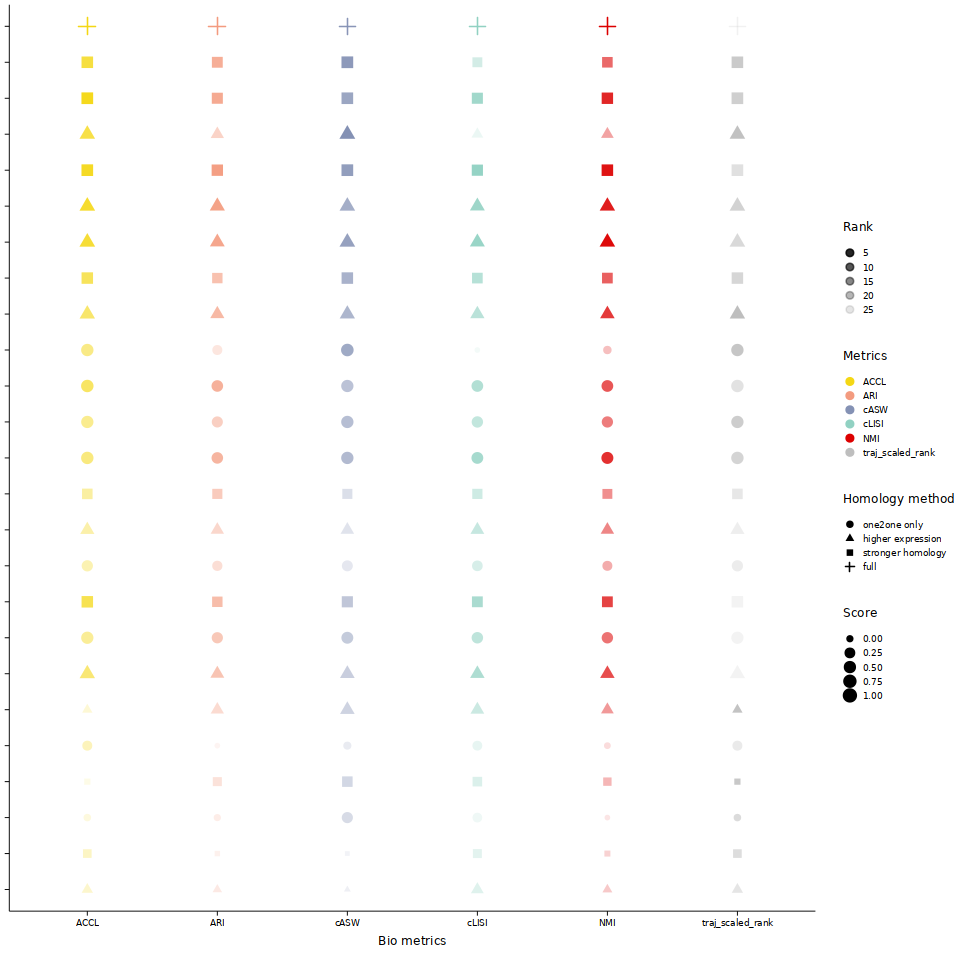

In [161]:
bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = homology_method)) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3)) + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", 'gray'))

In [169]:
bio_detail = bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ALCS", Metrics)) %>%
mutate(Metrics = gsub("traj_scaled_rank", "Traj", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = homology_method)) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method', guide = 'none') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans(), guide = 'none') +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3), guide = 'none') + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", 'gray'))

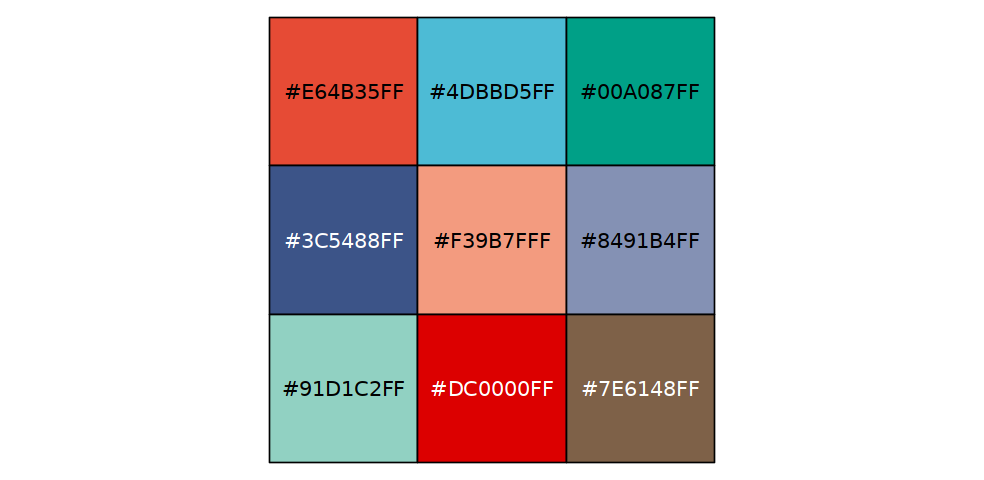

In [170]:
show_col(pal_npg("nrc")(9))

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


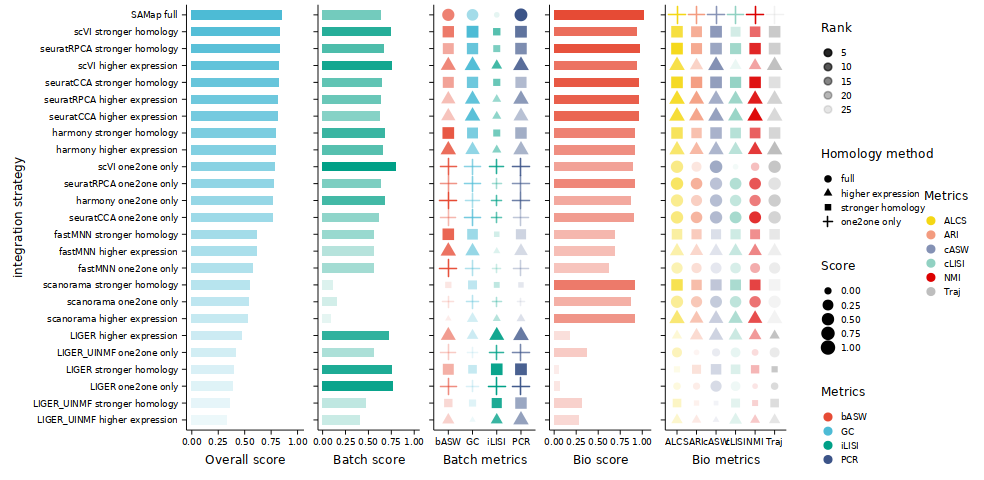

In [171]:
options(repr.plot.width = 8.2, repr.plot.height = 4)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

In [172]:
getwd()

[1] "/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Embryo_dr_xt/batch_metrics/cross_species/analysis_batch"

In [173]:
pdf("embryo_dr_xt_summary_metrics.pdf", height  = 4, width = 8.2)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

dev.off()


Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


png 
  2

In [174]:
ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% write_csv("embryo_dr_xt_batch_ranked.csv")

In [175]:
bio_ranking  %>% write_csv("embryo_dr_xt_bio_ranked.csv")